<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

In [106]:
# Creating Dataset and including the first row by setting no header as input
dataset = pd.read_csv('drive/My Drive/iris-data.csv', header = None)

# Renaming the columns
dataset.columns = ['sepal length in cm', 'sepal width in cm','petal length in cm','petal width in cm','species']
print('Shape of the dataset: ' + str(dataset.shape))
dataset.head()


Shape of the dataset: (150, 5)


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
#Creating the dependent variable class
#my_dict = {k: v for v, k in enumerate(dataset['species'].unique())}
#print(my_dict)

factor = pd.factorize(dataset['species'])
dataset.species = factor[0]
definitions = factor[1]
print("definitions: ", definitions)

dataset.species.head()

definitions:  Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [108]:
#Splitting the data into independent and dependent variables
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values
print('The independent features set: ')
print(X.shape)
print(X[:5,:])
print('The dependent variable: ')
print(y.shape)
print(y[:5])


The independent features set: 
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
The dependent variable: 
(150,)
[0 0 0 0 0]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

如果數據有離群點，對數據進行均差和方差的標準化效果不好，這種情況可以使用robust_scale和RobustScaler，它們有對數據中心化和數據的縮放魯棒性更強的參數；根據第1個四分位數和第3個四分位數之間的範圍來縮放數據

In [110]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'''
from sklearn.preprocessing import RobustScaler
ro=RobustScaler()
X_train = ro.fit_transform(X_train)
'''

'\nfrom sklearn.preprocessing import RobustScaler\nro=RobustScaler()\nX_train = ro.fit_transform(X_train)\n'

In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)

clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)


from sklearn.metrics import accuracy_score
print("accuray score: %.2f" % accuracy_score(y_test, y_pred))

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))


accuray score: 0.92
Predicted Species  Iris-setosa  Iris-versicolor  Iris-virginica
Actual Species                                                 
Iris-setosa                 13                0               0
Iris-versicolor              0               12               3
Iris-virginica               0                0              10


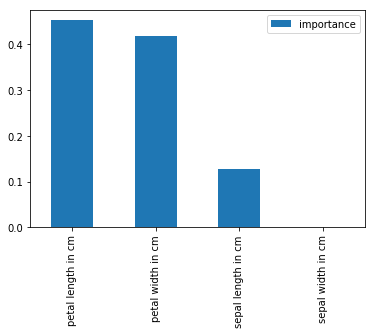

In [112]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = dataset.columns.drop(['species']),
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')